# SEEDS DATA SET:

Measurements of geometrical properties of kernels belonging to three different varieties of wheat-  Kama,Rosa and Canadian. 

A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

**Importing necessary Libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings. filterwarnings('ignore')

**Reading the seeds dataset:**

In [2]:
df=pd.read_csv('C:\\Users\\ABINAYA\\Desktop\\seeds.csv')
df.head()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


**Checking the data type of each attribute and if any missing value in each feature:**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
ID                      210 non-null int64
area                    210 non-null float64
perimeter               210 non-null float64
compactness             210 non-null float64
lengthOfKernel          210 non-null float64
widthOfKernel           210 non-null float64
asymmetryCoefficient    210 non-null float64
lengthOfKernelGroove    210 non-null float64
seedType                210 non-null int64
dtypes: float64(7), int64(2)
memory usage: 14.9 KB


**Every attribute median and max values of all features:**

In [4]:
df.describe()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,105.500000,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,60.765944,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,1.000000,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,53.250000,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,105.500000,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,157.750000,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,210.000000,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


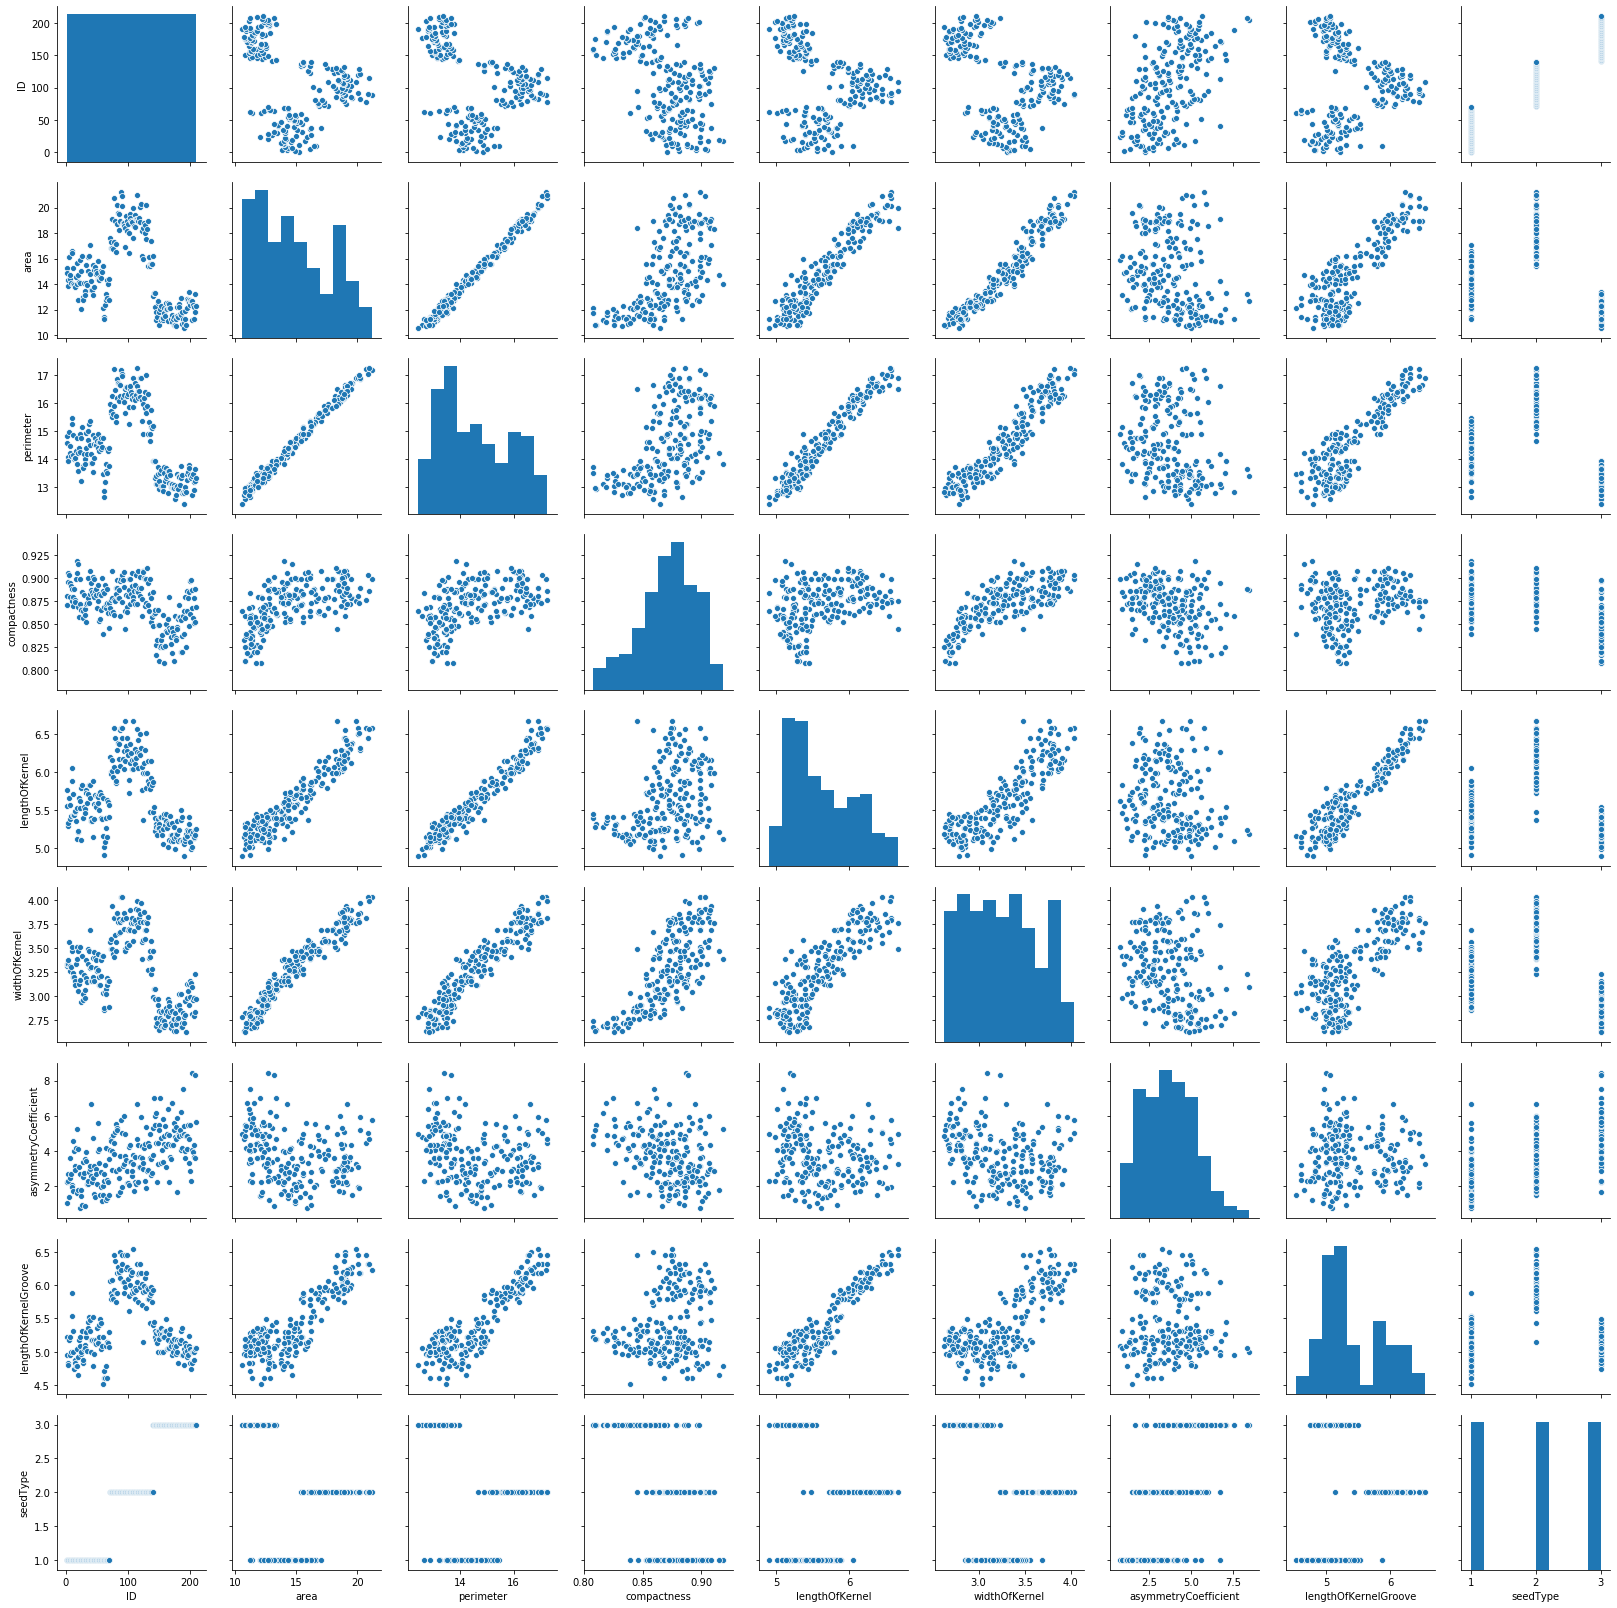

In [5]:
sns.pairplot(df)

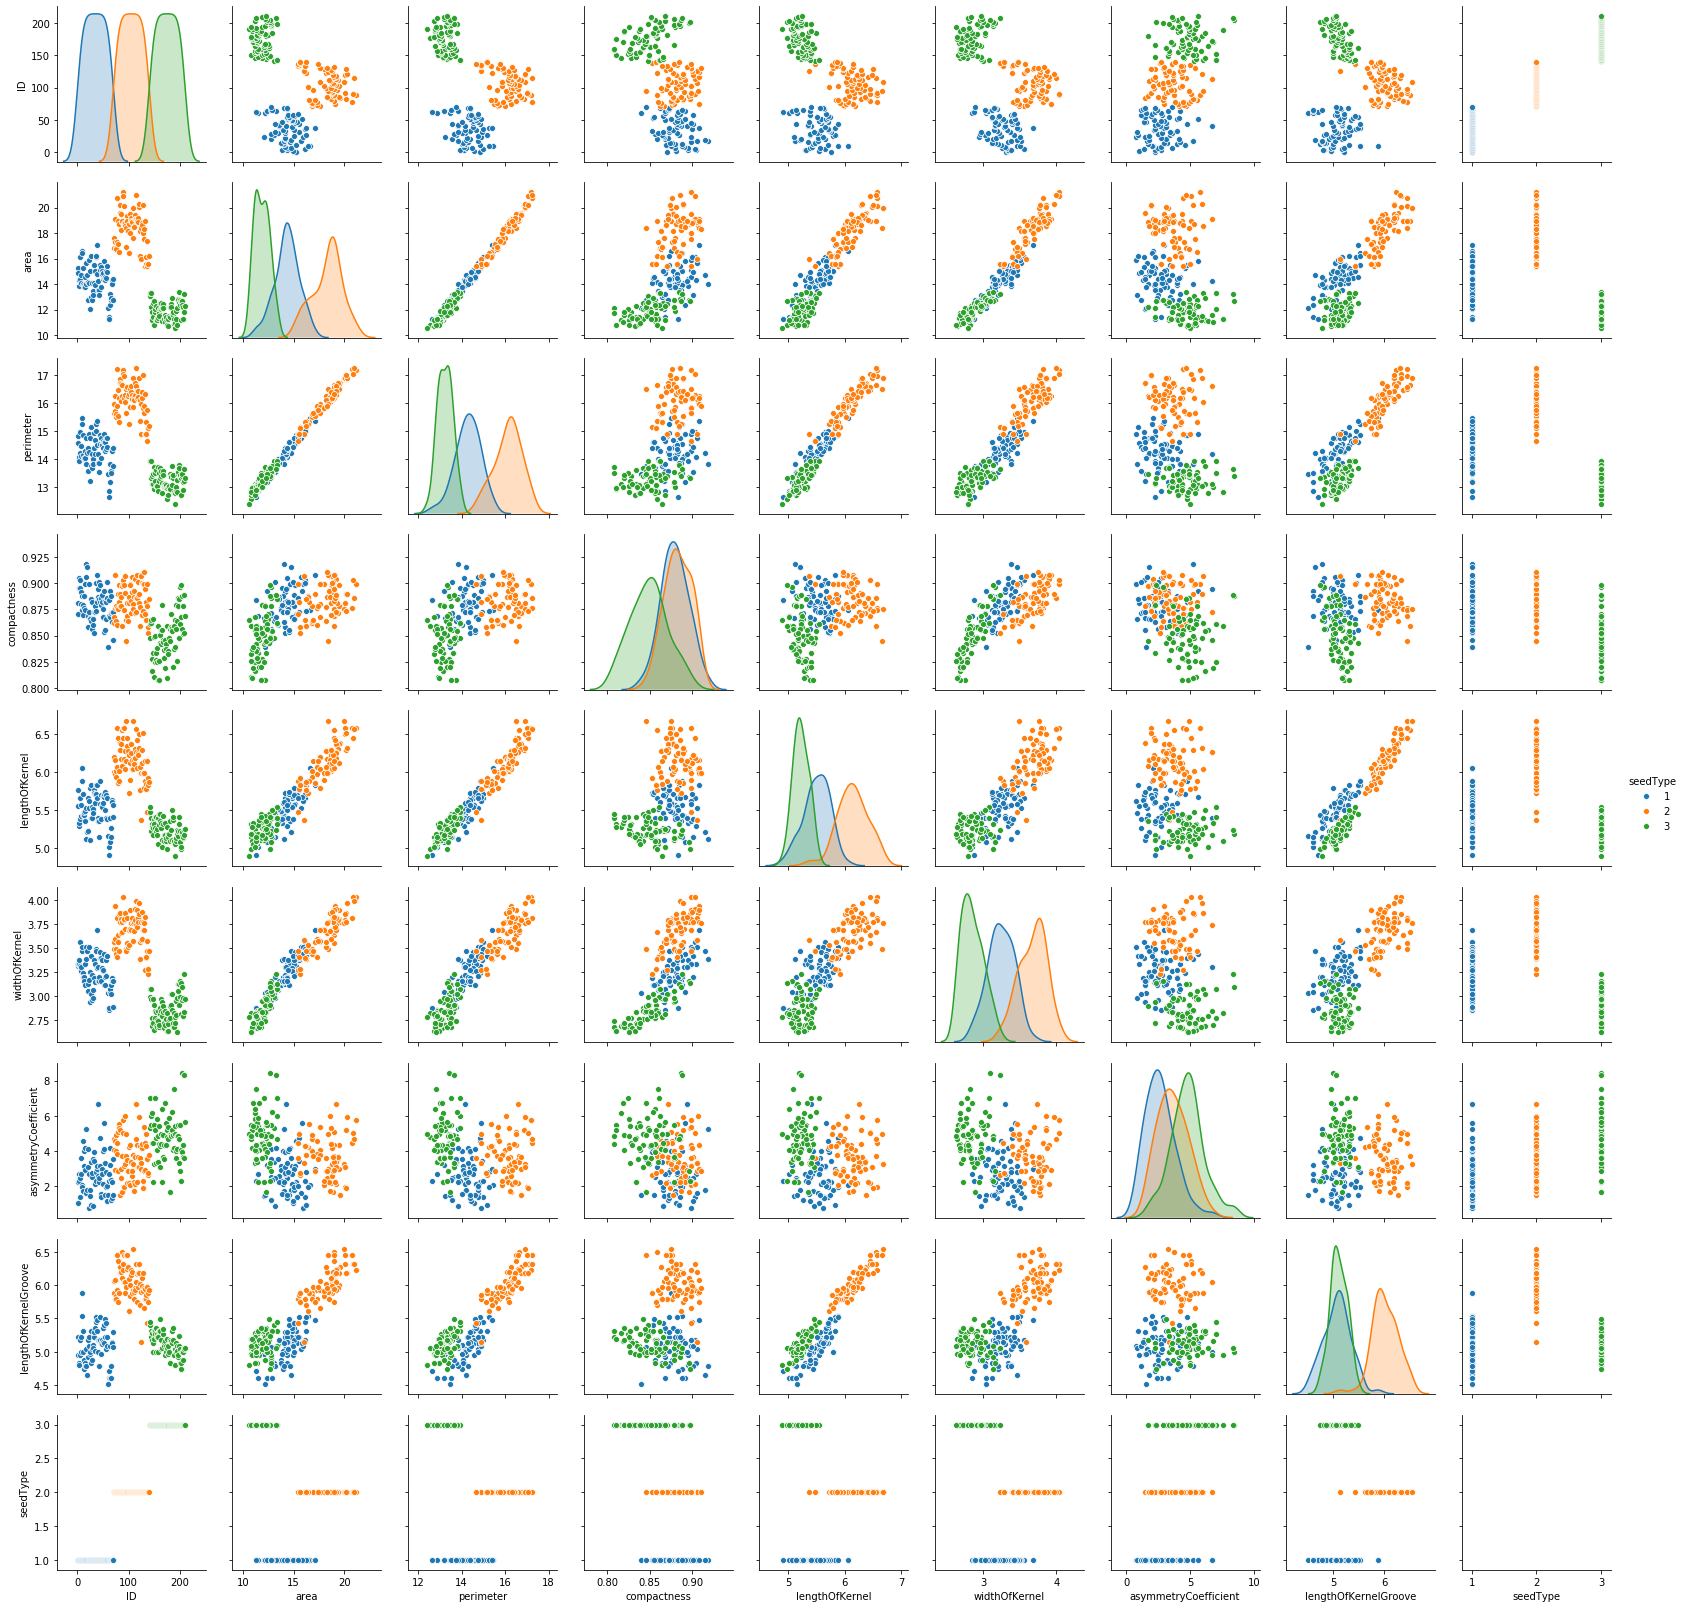

In [6]:
sns.pairplot(df,hue='seedType')

# Heat Map:

(8, 0)

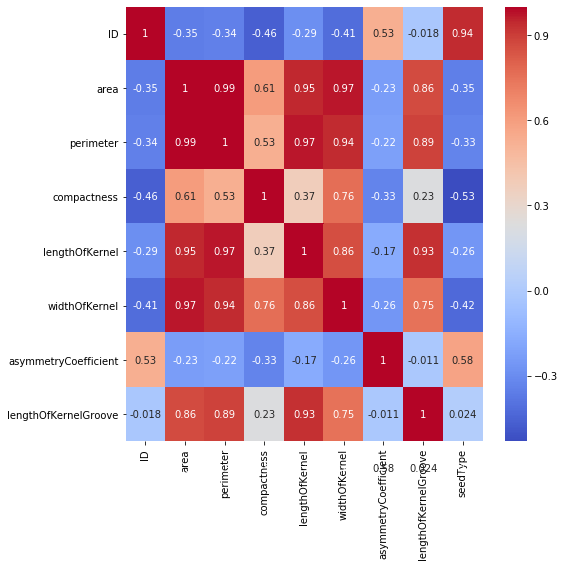

In [7]:
plt.figure(figsize=(8,8))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.ylim(8,0)

**Splitting independent and dependent variables:**

In [8]:
X=df.drop('ID',axis=1,inplace=True)

In [9]:
a=df.groupby('seedType').count()
a

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove
seedType,,,,,,,
1,70,70,70,70,70,70,70
2,70,70,70,70,70,70,70
3,70,70,70,70,70,70,70


In [10]:
feature_cols=['area','perimeter','compactness','lengthOfKernel','widthOfKernel','asymmetryCoefficient','lengthOfKernelGroove']

In [11]:
X=feature_cols
y=df['seedType']

In [12]:
df.area.astype(float)

0      15.26
1      14.88
2      14.29
3      13.84
4      16.14
       ...  
205    12.19
206    11.23
207    13.20
208    11.84
209    12.30
Name: area, Length: 210, dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
area                    210 non-null float64
perimeter               210 non-null float64
compactness             210 non-null float64
lengthOfKernel          210 non-null float64
widthOfKernel           210 non-null float64
asymmetryCoefficient    210 non-null float64
lengthOfKernelGroove    210 non-null float64
seedType                210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


**Standardization the data:**

In [14]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_new=ss.fit_transform(df)

In [15]:
X=df.drop('seedType',axis=1)

In [16]:
y=df['seedType']

**Train - Test Split:**

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3,test_size=0.30)

# LINEAR REGRESSION:

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [  1.48907206  -3.22037506 -30.67743866  -2.31510066   0.24598421
   0.1148875    2.1925973 ]
Intercept: 53.44355926819587
R^2 score: 0.7514585218342221


In [20]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.768349728952263
R^2 score for test: 0.6811917674725068


# LINEAR REGRESSION - OLS:

In [21]:
import statsmodels.api as sm
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()

predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               seedType   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     87.25
Date:                Sat, 11 Apr 2020   Prob (F-statistic):           1.37e-57
Time:                        19:44:39   Log-Likelihood:                -109.23
No. Observations:                 210   AIC:                             234.5
Df Residuals:                     202   BIC:                             261.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   53.4436      7.445      7.178      0.000      38.763      68.124
area                     1.4891      0.261      5.698      0.000       0.974       2.004
perimeter               -3.2204      0.538     -5.984      0.000      -4.281      -2.159
compactness            -30.6774      5.241     -5.853      0.000     -41.012     -20.343
lengthOfKernel          -2.3151      0.454     -5.094      0.000      -3.211      -1.419
widthOfKernel            0.2460      0.786      0.313      0.755      -1.303       1.795
asymmetryCoefficient     0.1149      0.023      5.089      0.000       0.070       0.159
lengthOfKernelGroove     2.1926      0.204     10.770      0.000       1.791       2.594
==============================================================================
Omnibus:                        3.773   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                4.443
Skew:                           0.075   Prob(JB):                        0.108
Kurtosis:                       3.697   Cond. No.                     7.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let's deal the problem with Classification first.

# LOGISTIC REGRESSION:

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(fit_intercept=True,solver='liblinear',multi_class='ovr')
model.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
y_test_prob=model.predict_proba(X_test)

In [23]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
predict=model.predict(X_train)

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve, classification_report

In [26]:
print(classification_report(y_train,predict))

              precision    recall  f1-score   support

           1       0.89      0.83      0.86        48
           2       0.92      0.94      0.93        47
           3       0.93      0.96      0.94        52

    accuracy                           0.91       147
   macro avg       0.91      0.91      0.91       147
weighted avg       0.91      0.91      0.91       147



In [27]:
print('AUC Value of the model:',roc_auc_score(y_test,y_test_prob,multi_class='ovr'))

AUC Value of the model: 0.989449986689883


# DECISION TREE CLASSIFIER:

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [29]:
dt.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

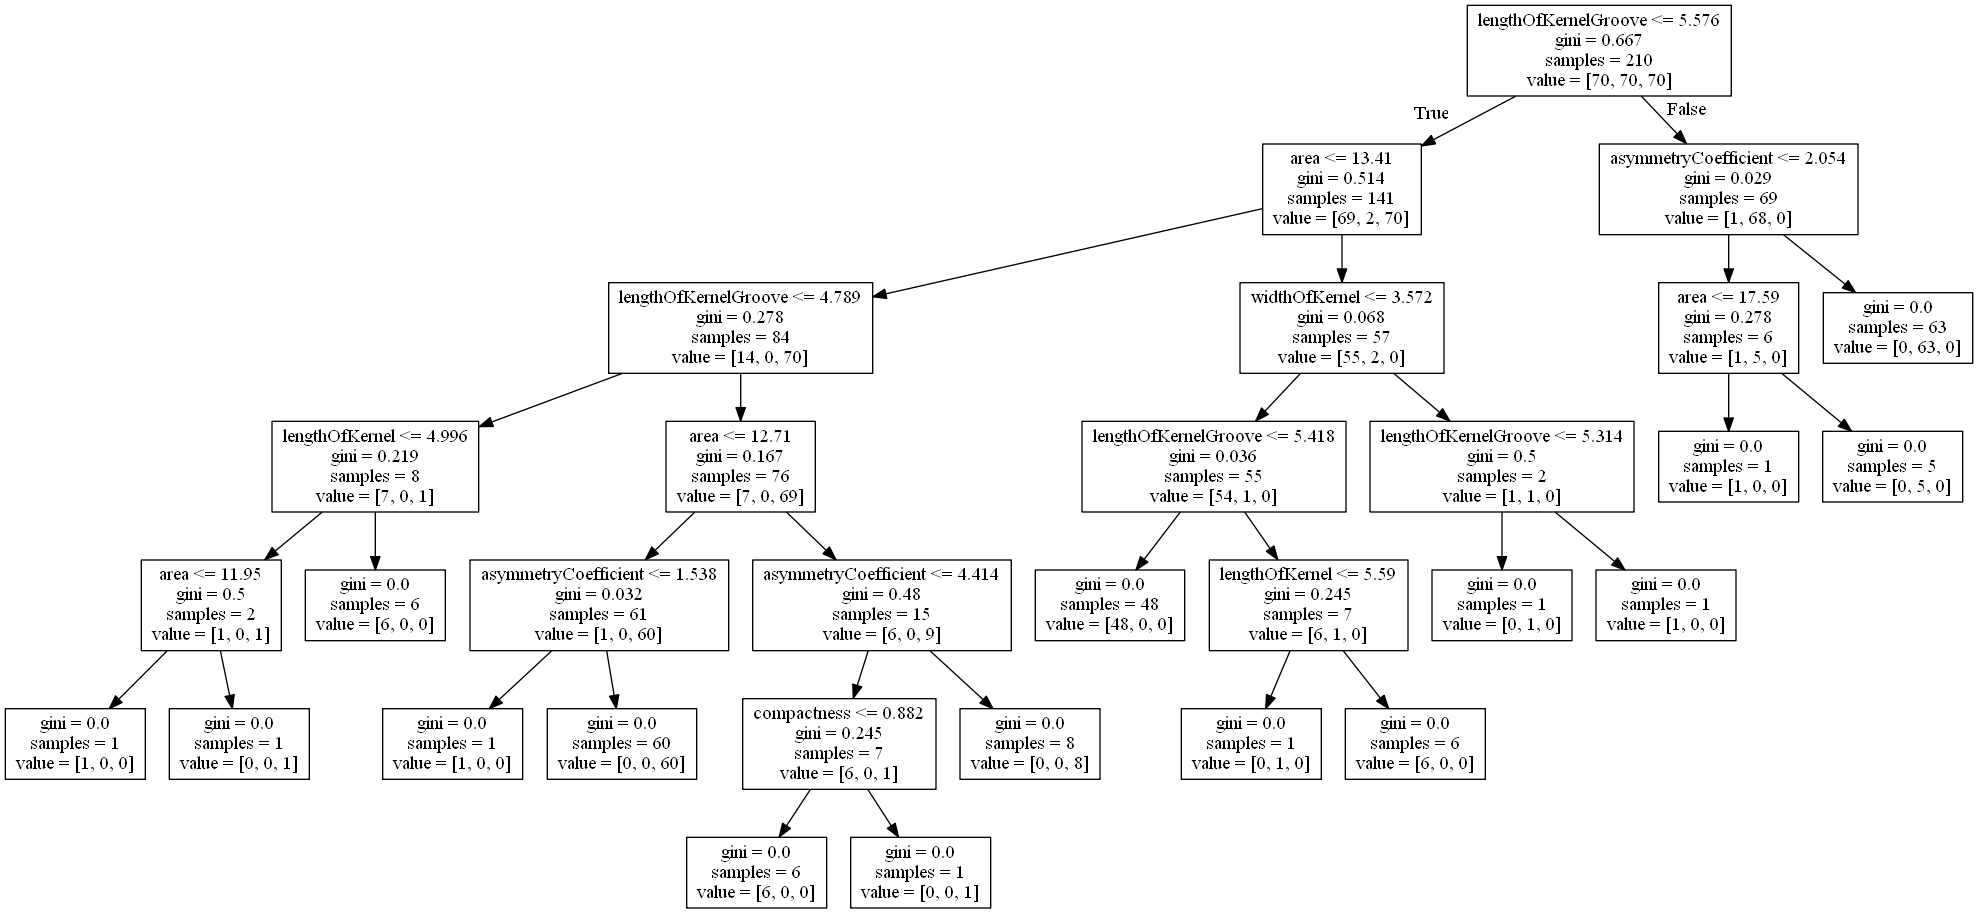

In [30]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

features = X.columns
# Create DOT data
dot_data = export_graphviz(dt, out_file=None, feature_names=features)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [31]:
dt=DecisionTreeClassifier()

dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
y_test_pred=dt.predict(X_test)
y_test_prob=dt.predict_proba(X_test)

print ('Confusion Matrix -Test :','\n',confusion_matrix(y_test,y_test_pred))

print ('Overall accuracy -Test :',accuracy_score(y_test,y_test_pred))

print ('AUC -Test :', roc_auc_score(y_test,y_test_prob,multi_class='ovr'))

Confusion Matrix -Test : 
 [[21  0  1]
 [ 2 21  0]
 [ 1  0 17]]
Overall accuracy -Test : 0.9365079365079365
AUC -Test : 0.9527734038868716


# **Decision Tree - HYPER PARAMETER TUNING USING GRID SEARCH:**

In [33]:
from sklearn.model_selection import GridSearchCV

dtc=DecisionTreeClassifier()


#from sklearn import preprocessing
#y = preprocessing.label_binarize(y, classes=[0, 1, 2])

params={'max_depth':[2,3,4,5,6],
        'min_samples_leaf':[1,2,3,4,5,6,7],
        'min_samples_split':[2,3,4,5,6,7,8,9,10],
        'criterion':['gini','entrophy']}
gsearch=GridSearchCV(dtc,param_grid=params,cv=3,scoring='accuracy')

In [34]:
gsearch.fit(X,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entrophy'],
                  

In [35]:
gsearch.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [36]:
gs=pd.DataFrame(gsearch.cv_results_)
gs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006000,0.000817,0.003338,4.729464e-04,gini,2,1,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.914286,0.9,0.842857,0.885714,0.030861,146
1,0.007340,0.000471,0.003669,4.717076e-04,gini,2,1,3,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.914286,0.9,0.842857,0.885714,0.030861,146
2,0.007671,0.000471,0.003670,9.421248e-04,gini,2,1,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.914286,0.9,0.842857,0.885714,0.030861,146
3,0.008004,0.000002,0.004003,1.946680e-07,gini,2,1,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.914286,0.9,0.842857,0.885714,0.030861,146
4,0.008339,0.000472,0.003669,4.714266e-04,gini,2,1,6,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.914286,0.9,0.842857,0.885714,0.030861,146


In [37]:
dt=DecisionTreeClassifier(**gsearch.best_params_)

dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
y_test_pred=dt.predict(X_test)
y_test_prob=dt.predict_proba(X_test)

print ('Confusion Matrix -Test :','\n',confusion_matrix(y_test,y_test_pred))

print ('Overall accuracy -Test :',accuracy_score(y_test,y_test_pred))

print ('AUC -Test :', roc_auc_score(y_test,y_test_prob,multi_class='ovr'))

Confusion Matrix -Test : 
 [[21  0  1]
 [ 1 22  0]
 [ 1  0 17]]
Overall accuracy -Test : 0.9523809523809523
AUC -Test : 0.96297978905349


# Decision Tree - HYPER PARAMETER TUNING USING RANDOMIZED SEARCH:

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

dtc=DecisionTreeClassifier()
params={'max_depth':sp_randint(2,20),
        'min_samples_leaf':sp_randint(1,20),
        'min_samples_split':sp_randint(2,40),
        'criterion':['gini','entrophy']}


rsearch=RandomizedSearchCV(dtc,param_distributions=params,
                           cv=3,n_iter=200,scoring='accuracy')

In [40]:
rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [41]:
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 5}

In [42]:
rs=pd.DataFrame(rsearch.cv_results_)
rs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002335,4.714827e-04,0.000000,0.000000e+00,entrophy,10,11,25,"{'criterion': 'entrophy', 'max_depth': 10, 'mi...",NaN,NaN,NaN,NaN,NaN,200
1,0.003002,1.946680e-07,0.001001,2.247832e-07,gini,2,2,31,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.914286,0.900000,0.842857,0.885714,0.030861,19
2,0.002001,1.123916e-07,0.000000,0.000000e+00,entrophy,7,18,28,"{'criterion': 'entrophy', 'max_depth': 7, 'min...",NaN,NaN,NaN,NaN,NaN,121
3,0.002001,1.123916e-07,0.000000,0.000000e+00,entrophy,3,4,12,"{'criterion': 'entrophy', 'max_depth': 3, 'min...",NaN,NaN,NaN,NaN,NaN,123
4,0.002668,4.717075e-04,0.001001,1.946680e-07,gini,6,12,30,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.857143,0.942857,0.842857,0.880952,0.044160,44


In [43]:
dt=DecisionTreeClassifier(**rsearch.best_params_)

dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
y_test_pred=dt.predict(X_test)
y_test_prob=dt.predict_proba(X_test) 

print ('Confusion Matrix -Test :','\n',confusion_matrix(y_test,y_test_pred))

print ('Overall accuracy -Test :',accuracy_score(y_test,y_test_pred))

print ('AUC -Test :', roc_auc_score(y_test,y_test_prob,multi_class='ovr'))

Confusion Matrix -Test : 
 [[21  0  1]
 [ 1 22  0]
 [ 1  0 17]]
Overall accuracy -Test : 0.9523809523809523
AUC -Test : 0.9624044785865807


Desicion Tree classifier and hyperparameter tuning using grid search and randomised search all 3 give an accuracy of 0.95 and AUC is about 0.96  for the test data.

# RANDOM FOREST CLASSIFIER:

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3,test_size=0.30)

In [46]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict_proba(X_test)

print ('Confusion Matrix -Test :','\n',confusion_matrix(y_test,y_test_pred))

print ('Overall accuracy -Test :',accuracy_score(y_test,y_test_pred))

print ('AUC -Test :', roc_auc_score(y_test,y_test_prob,multi_class='ovr'))

Confusion Matrix -Test : 
 [[21  0  1]
 [ 2 21  0]
 [ 1  0 17]]
Overall accuracy -Test : 0.9365079365079365
AUC -Test : 0.992376447004113


# Random Forest -  HYPER PARAMETER TUNING USING RANDOMIZED SEARCH:

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
rfc=RandomForestClassifier()

params={'n_estimators':sp_randint(100,200),
        'max_features':sp_randint(1,24),
        'max_depth':sp_randint(2,10),
        'min_samples_split':sp_randint(2,20),
        'min_samples_leaf':sp_randint(1,20),
        'criterion':['gini','entropy']}

rsearch=RandomizedSearchCV(rfc,param_distributions=params,n_iter=50,cv=3,scoring='accuracy',
                           random_state=3,return_train_score=True)
rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [49]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 141}

In [50]:
pd.DataFrame(rsearch.cv_results_).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.431619,0.091918,0.068377,0.029958,gini,2,4,9,2,121,...,0.900000,0.785714,0.866667,0.057538,9,0.914286,0.907143,0.950000,0.92381,0.018748
1,0.267845,0.071122,0.000000,0.000000,entropy,5,11,12,11,110,...,NaN,NaN,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN
2,1.000331,0.259498,0.079052,0.028303,entropy,9,7,1,14,193,...,0.942857,0.800000,0.885714,0.061721,4,0.978571,0.957143,0.992857,0.97619,0.014677
3,0.238159,0.039048,0.000000,0.000000,entropy,8,18,3,4,163,...,NaN,NaN,NaN,NaN,34,NaN,NaN,NaN,NaN,NaN
4,0.253502,0.006948,0.000000,0.000000,gini,3,20,6,10,197,...,NaN,NaN,NaN,NaN,35,NaN,NaN,NaN,NaN,NaN


In [51]:
rfc=RandomForestClassifier(**rsearch.best_params_,random_state=3)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=141,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [52]:
y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict_proba(X_test)

print ('Confusion Matrix -Test :','\n',confusion_matrix(y_test,y_test_pred))

print ('Overall accuracy -Test :',accuracy_score(y_test,y_test_pred))

print ('AUC -Test :', roc_auc_score(y_test,y_test_prob,multi_class='ovr'))

Confusion Matrix -Test : 
 [[21  0  1]
 [ 1 22  0]
 [ 1  0 17]]
Overall accuracy -Test : 0.9523809523809523
AUC -Test : 0.9868790116315743


# Random Forest - HYPER PARAMETER TUNING USING GRID SEARCH:

In [53]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()

params={'max_depth':[2,3,4,5,6],
        'min_samples_leaf':[1,2,3,4,5,6,7],
        'min_samples_split':[2,3,4,5,6,7,8,9,10],
        'criterion':['gini','entrophy']}
gsearch=GridSearchCV(dtc,param_grid=params,cv=3,scoring='accuracy')

In [54]:
gsearch.fit(X,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entrophy'],
                  

In [55]:
gsearch.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [56]:
gs=pd.DataFrame(gsearch.cv_results_)
gs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007674,0.000470,0.003669,0.000472,gini,2,1,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.914286,0.9,0.842857,0.885714,0.030861,148
1,0.008673,0.000944,0.004337,0.001248,gini,2,1,3,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.914286,0.9,0.842857,0.885714,0.030861,148
2,0.007671,0.000945,0.004003,0.000817,gini,2,1,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.914286,0.9,0.842857,0.885714,0.030861,148
3,0.008340,0.001254,0.002668,0.000944,gini,2,1,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.914286,0.9,0.842857,0.885714,0.030861,148
4,0.008006,0.001416,0.004335,0.000943,gini,2,1,6,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.914286,0.9,0.842857,0.885714,0.030861,148


In [57]:
rfc=RandomForestClassifier(**gsearch.best_params_)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
y_test_pred=dt.predict(X_test)
y_test_prob=dt.predict_proba(X_test)

print ('Confusion Matrix -Test :','\n',confusion_matrix(y_test,y_test_pred))

print ('Overall accuracy -Test :',accuracy_score(y_test,y_test_pred))

print ('AUC -Test :', roc_auc_score(y_test,y_test_prob,multi_class='ovr'))

Confusion Matrix -Test : 
 [[21  0  1]
 [ 1 22  0]
 [ 1  0 17]]
Overall accuracy -Test : 0.9523809523809523
AUC -Test : 0.9624044785865807


Random Forest classifier and the hyper parameters have been tuned using grid search and randomised search. Out of which rsearch has the highest accuracy in test data.

# MULTINOMINAL NAIVE BAYES:

In [59]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()

In [60]:
mnb.fit(X_train,y_train)

y_test_pred=mnb.predict(X_test)
y_test_prob=mnb.predict_proba(X_test)

print ('Confusion Matrix -Test :','\n',confusion_matrix(y_test,y_test_pred))

print ('Overall accuracy -Test :',accuracy_score(y_test,y_test_pred))

print ('AUC -Test :', roc_auc_score(y_test,y_test_prob, multi_class='ovr'))

Confusion Matrix -Test : 
 [[19  0  3]
 [ 3 19  1]
 [ 3  0 15]]
Overall accuracy -Test : 0.8412698412698413
AUC -Test : 0.8779669559980624


# ADA BOOST CLASSIFIER:

In [61]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=3)

ada.fit(X_train,y_train)


y_test_pred=ada.predict(X_test)
y_test_prob = ada.predict_proba(X_test)
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob,multi_class='ovr'))

Confusion Matrix - Test :  
 [[ 0  2 20]
 [ 5 17  1]
 [ 0  0 18]]
Classification Report - Test :  
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.89      0.74      0.81        23
           3       0.46      1.00      0.63        18

    accuracy                           0.56        63
   macro avg       0.45      0.58      0.48        63
weighted avg       0.46      0.56      0.48        63

Overall Accuracy - Test :  0.5555555555555556
AUC - Test :  0.8001255931531648


# LIGHTGBM CLASSIFIER:

In [62]:
import lightgbm as lgb
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [63]:
lgbm = lgb.LGBMClassifier()

In [64]:
params = { 'n_estimators' : sp_randint(50,200),
        'max_depth' : sp_randint(2,15),
         'learning_rate' : sp_uniform(0.201,0.5),
         'num_leaves' : sp_randint(20,50)}

In [65]:
rsearch = RandomizedSearchCV(lgbm, param_distributions=params, cv=3, n_iter=200, n_jobs=-1, random_state=3)

In [66]:
rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, sile...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000023DA44B40

In [67]:
rsearch.best_params_

{'learning_rate': 0.5750787180857195,
 'max_depth': 6,
 'n_estimators': 149,
 'num_leaves': 47}

In [68]:
lgbm = lgb.LGBMClassifier(**rsearch.best_params_)
lgbm.fit(X_train,y_train)

y_test_pred=lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob,multi_class='ovr'))

Confusion Matrix - Test :  
 [[21  0  1]
 [ 1 22  0]
 [ 2  0 16]]
Classification Report - Test :  
               precision    recall  f1-score   support

           1       0.88      0.95      0.91        22
           2       1.00      0.96      0.98        23
           3       0.94      0.89      0.91        18

    accuracy                           0.94        63
   macro avg       0.94      0.93      0.94        63
weighted avg       0.94      0.94      0.94        63

Overall Accuracy - Test :  0.9365079365079365
AUC - Test :  0.9946801088930228


out of the all the boosting techniques used, LightGBM works the best.

# STACKING the results of 3 learners (Decision Tree, K-NN , Logistic Regression)

In [69]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')

lr.fit(X_train,y_train)

y_test_pred=lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob,multi_class='ovr'))

Confusion Matrix - Test :  
 [[21  1  0]
 [ 0 23  0]
 [ 2  0 16]]
Classification Report - Test :  
               precision    recall  f1-score   support

           1       0.91      0.95      0.93        22
           2       0.96      1.00      0.98        23
           3       1.00      0.89      0.94        18

    accuracy                           0.95        63
   macro avg       0.96      0.95      0.95        63
weighted avg       0.95      0.95      0.95        63

Overall Accuracy - Test :  0.9523809523809523
AUC - Test :  0.989449986689883


# K-NN ALGORITHM:

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint

knn = KNeighborsClassifier()

params={'n_neighbors' : sp_randint(1,15),'p' : sp_randint(1,5)}

rsearch_knn = RandomizedSearchCV(knn, param_distributions=params, cv =3,n_iter=50,n_jobs=-1,return_train_score=True, random_state=3)

rsearch_knn.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000023DA4A5988>,
                                        'p': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000023DA4A5748>},
                   pre_dispatch='2*n_jobs', random_state=3, refit=True,
                   return_train_score=True, scoring=None, verbose=0)

In [71]:
rsearch_knn.best_params_

{'n_neighbors': 9, 'p': 1}

In [72]:
knn = KNeighborsClassifier(**rsearch_knn.best_params_)

In [73]:
knn.fit(X_train,y_train)
y_train_pred=knn.predict(X_train)

y_test_pred=knn.predict(X_test)
y_test_prob = knn.predict_proba(X_test)

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob,multi_class='ovr'))

Confusion Matrix - Test :  
 [[19  1  2]
 [ 1 22  0]
 [ 1  0 17]]
Classification Report - Test :  
               precision    recall  f1-score   support

           1       0.90      0.86      0.88        22
           2       0.96      0.96      0.96        23
           3       0.89      0.94      0.92        18

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63

Overall Accuracy - Test :  0.9206349206349206
AUC - Test :  0.9891267303648004


In [74]:
from sklearn.ensemble import VotingClassifier

lr=LogisticRegression(solver='liblinear')
knn=KNeighborsClassifier(**rsearch_knn.best_params_)
dt=DecisionTreeClassifier(**gsearch.best_params_)

In [75]:
## Hard Voting

clf = VotingClassifier(estimators=[('lr',lr),('knn',knn),('dt',dt)], voting='hard')

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print("Accuracy score Train : ",accuracy_score(y_train,y_train_pred))
print("Accuracy score Test : ",accuracy_score(y_test,y_test_pred))
print("\n")
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob,multi_class='ovr'))

Accuracy score Train :  0.9455782312925171
Accuracy score Test :  0.9365079365079365


Confusion Matrix - Test :  
 [[20  1  1]
 [ 1 22  0]
 [ 1  0 17]]
Classification Report - Test :  
               precision    recall  f1-score   support

           1       0.91      0.91      0.91        22
           2       0.96      0.96      0.96        23
           3       0.94      0.94      0.94        18

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63

Overall Accuracy - Test :  0.9365079365079365
AUC - Test :  0.9891267303648004


In [76]:
#Soft Voting -- equal weightages

clf =VotingClassifier(estimators=[('lr',lr),('knn',knn),('dt',dt)],voting='soft')

clf.fit(X_train,y_train)

y_test_pred=clf.predict(X_test)
y_test_prob = clf.predict_proba(X_test)
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob,multi_class='ovr'))

Confusion Matrix - Test :  
 [[21  0  1]
 [ 1 22  0]
 [ 1  0 17]]
Classification Report - Test :  
               precision    recall  f1-score   support

           1       0.91      0.95      0.93        22
           2       1.00      0.96      0.98        23
           3       0.94      0.94      0.94        18

    accuracy                           0.95        63
   macro avg       0.95      0.95      0.95        63
weighted avg       0.95      0.95      0.95        63

Overall Accuracy - Test :  0.9523809523809523
AUC - Test :  0.9951263747010183


In [77]:
#Soft Voting -- Different weightages

clf =VotingClassifier(estimators=[('lr',lr),('knn',knn),('dt',dt)],weights=[1,2,3],voting='soft')
clf.fit(X_train,y_train)

y_test_pred=clf.predict(X_test)
y_test_prob = clf.predict_proba(X_test)

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob,multi_class='ovr'))

Confusion Matrix - Test :  
 [[21  0  1]
 [ 1 22  0]
 [ 1  0 17]]
Classification Report - Test :  
               precision    recall  f1-score   support

           1       0.91      0.95      0.93        22
           2       1.00      0.96      0.98        23
           3       0.94      0.94      0.94        18

    accuracy                           0.95        63
   macro avg       0.95      0.95      0.95        63
weighted avg       0.95      0.95      0.95        63

Overall Accuracy - Test :  0.9523809523809523
AUC - Test :  0.9943945067104017


Stacking 3 learners for better results, with the scaled data - we can find the overall accuracy and Auc results of the test data has been better in terms of Soft voting either using equal weightages or different weightages than Hard voting technique.

___________________________________________________________________________________________________________________________

**Having dealt the problem wrt classification, lets check on how the data performs when the problem is processed with clustering algorithms and techniques.**

# CLUSTERING:

In [78]:
df2=df.copy()

In [81]:
from scipy.stats import zscore
df_scaled = df2.apply(zscore)

In [82]:
df_scaled.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,-1.224745
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,-1.224745
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,-1.224745
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,-1.224745
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,-1.224745


# K - MEANS:

In [98]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)

In [99]:
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [100]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df_scaled)
 # labels = clusters.labels_
 # centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,1680.000000
1,2,864.528864
2,3,456.712081
3,4,402.238307
4,5,357.340809
5,6,323.468018
6,7,292.856116
7,8,268.702873
8,9,247.787864
9,10,228.952756


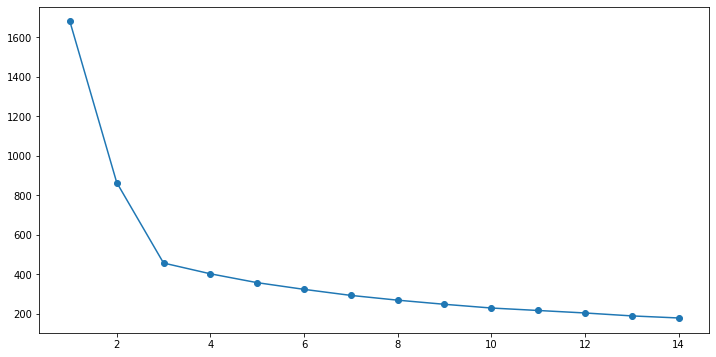

In [101]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [102]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

In [103]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)

In [104]:
centroids = kmeans.cluster_centers_

In [105]:
centroids

array([[ 1.21270324,  1.22413366,  0.51723629,  1.20908366,  1.11527789,
        -0.05541116,  1.27193866, -0.03499271],
       [-1.02442616, -1.00658787, -0.91587488, -0.9027431 , -1.07435838,
         0.72547911, -0.59487279,  1.22474487],
       [-0.18827708, -0.21754579,  0.39863859, -0.30634055, -0.04091951,
        -0.67006795, -0.67706587, -1.18975216]])

In [106]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [107]:
centroid_df

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,1.212703,1.224134,0.517236,1.209084,1.115278,-0.055411,1.271939,-0.034993
1,-1.024426,-1.006588,-0.915875,-0.902743,-1.074358,0.725479,-0.594873,1.224745
2,-0.188277,-0.217546,0.398639,-0.306341,-0.040920,-0.670068,-0.677066,-1.189752


In [108]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [109]:
snail_df_labeled = df.join(df_labels)

In [110]:
df_analysis = (snail_df_labeled.groupby(['labels'] , axis=0)).head() 
df_analysis

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType,labels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,2
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1,0
37,17.08,15.38,0.9079,5.832,3.683,2.956,5.484,1,0
70,17.63,15.98,0.8673,6.191,3.561,4.076,6.060,2,0
71,16.84,15.67,0.8623,5.998,3.484,4.675,5.877,2,0
72,17.26,15.73,0.8763,5.978,3.594,4.539,5.791,2,0


In [111]:
snail_df_labeled['labels'].value_counts() 

2    70
1    70
0    70
Name: labels, dtype: int64

In [112]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

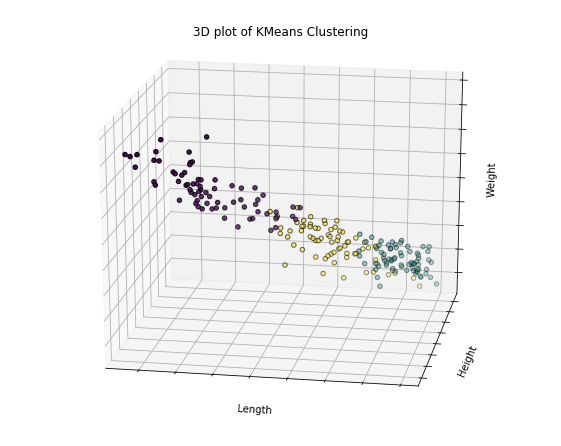

In [113]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
kmeans.fit(df_scaled)
labels = kmeans.labels_
ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], df_scaled.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

In [114]:
# Now we know our best k value is 3, I am creating a new kmeans model:
kmeans2 = KMeans(n_clusters=3)

# Training the model:
clusters = kmeans2.fit_predict(df)

# Adding a label feature with the predicted class values:
df_k = df.copy(deep=True)
df_k['label'] = clusters

**Comparing Original Classes and K-Means Algorithm Classes:**

For visualization I will use only two features (area and perimeter) for the original and predicted datasets. Different classes will have seperate color and styles.

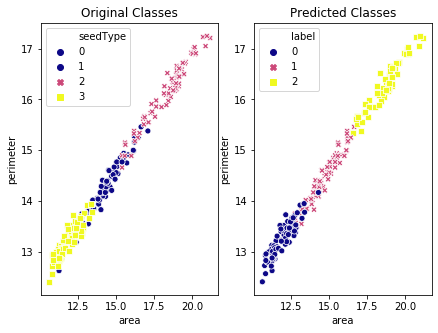

In [115]:
plt.figure(figsize=(7,5))
ax1 = plt.subplot(1,2,1)
plt.title('Original Classes')
sns.scatterplot(x='area', y='perimeter', hue='seedType', style='seedType', palette='plasma',data=df, ax=ax1)

ax2 = plt.subplot(1,2,2)
plt.title('Predicted Classes')
sns.scatterplot(x='area', y='perimeter', hue='label', style='label', palette='plasma',data=df_k, ax=ax2)
plt.show()

In [116]:
print('Original Data Classes:')
print(df.seedType.value_counts())
print('-' * 30)
print('Predicted Data Classes:')
print(df_k.label.value_counts())

Original Data Classes:
3    70
2    70
1    70
Name: seedType, dtype: int64
------------------------------
Predicted Data Classes:
0    75
1    74
2    61
Name: label, dtype: int64


**HIERARCHICAL CLUSTERING ALGORITHM:**

**Creating the Dendrogram:**

We use dendrogram to find how many classes we have in our data set.

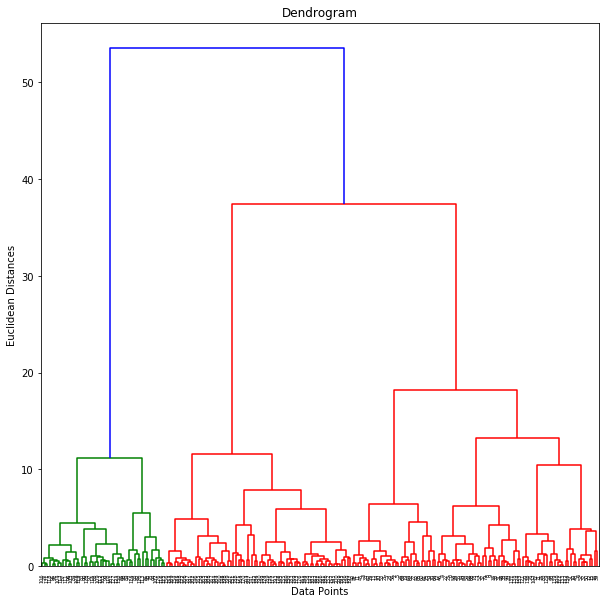

In [117]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=[10,10])
merg = linkage(df, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

**From the dendrogram we can read there are 3 classes in our data set.**

**Hierarchical Clustering Algorithm:**

In [118]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster2 = hie_clus.fit_predict(df)

df_h = df.copy(deep=True)
df_h['label'] = cluster2

**Comparing Original, K-Means and Hierarchical Clustered Classes:**

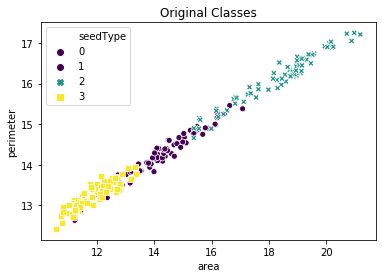

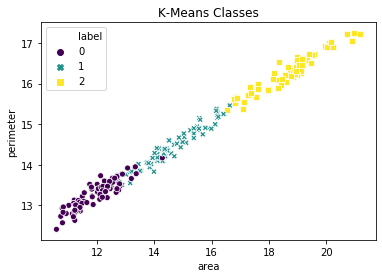

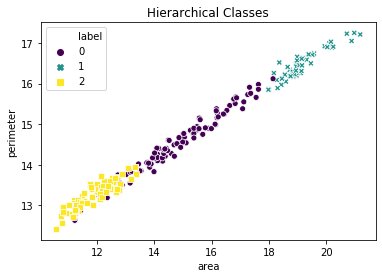

In [119]:
plt.title('Original Classes')
sns.scatterplot(x='area', y='perimeter', hue='seedType', style='seedType', data=df,palette='viridis')
plt.show()
plt.title('K-Means Classes')
sns.scatterplot(x='area', y='perimeter', hue='label', style='label', data=df_k,palette='viridis')
plt.show()
plt.title('Hierarchical Classes')
sns.scatterplot(x='area', y='perimeter', hue='label', style='label', data=df_h,palette='viridis')
plt.show()

In [120]:
print('Original Data Classes:')
print(df.seedType.value_counts())
print('-' * 30)
print('K-Means Predicted Data Classes:')
print(df_k.label.value_counts())
print('-' * 30)
print('Hierarchical Predicted Data Classes:')
print(df_h.label.value_counts())

Original Data Classes:
3    70
2    70
1    70
Name: seedType, dtype: int64
------------------------------
K-Means Predicted Data Classes:
0    75
1    74
2    61
Name: label, dtype: int64
------------------------------
Hierarchical Predicted Data Classes:
0    93
2    70
1    47
Name: label, dtype: int64


# Silhouette analysis for K-Means clustering:

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083261


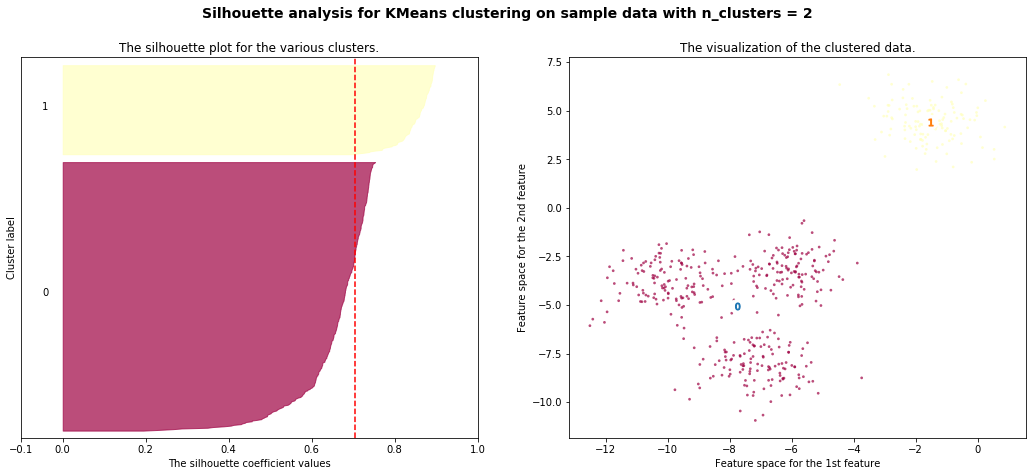

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


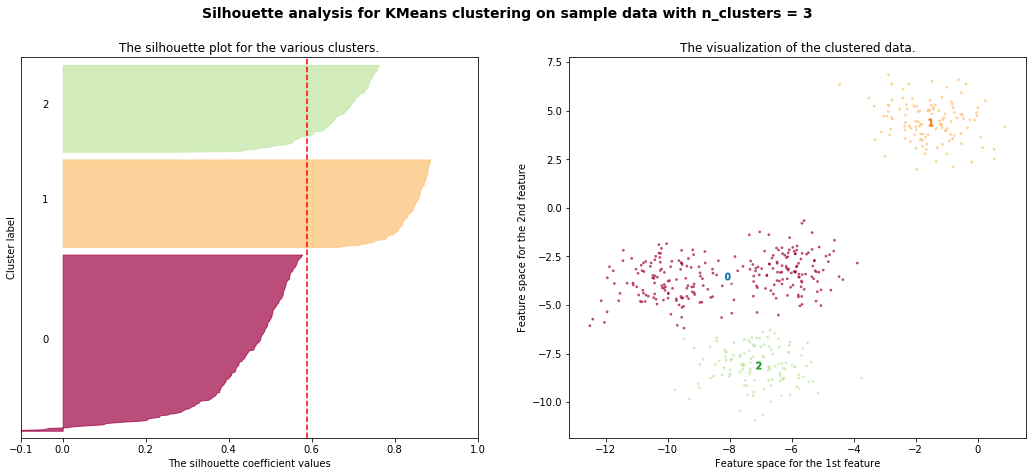

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


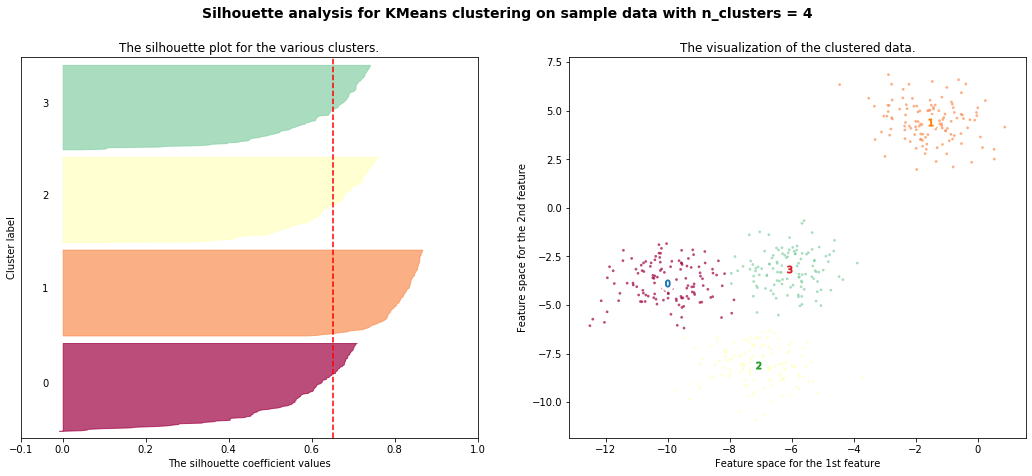

For n_clusters = 5 The average silhouette_score is : 0.5745566973301872


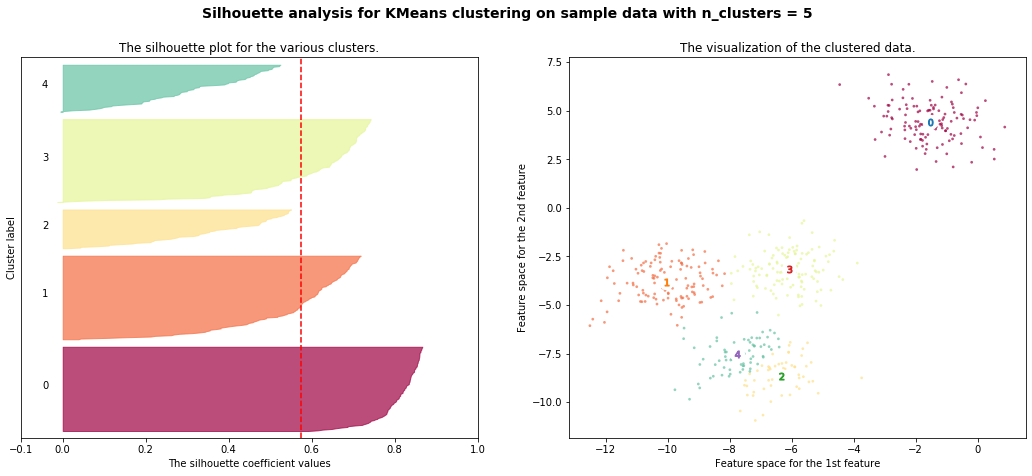

For n_clusters = 6 The average silhouette_score is : 0.4390271118313242


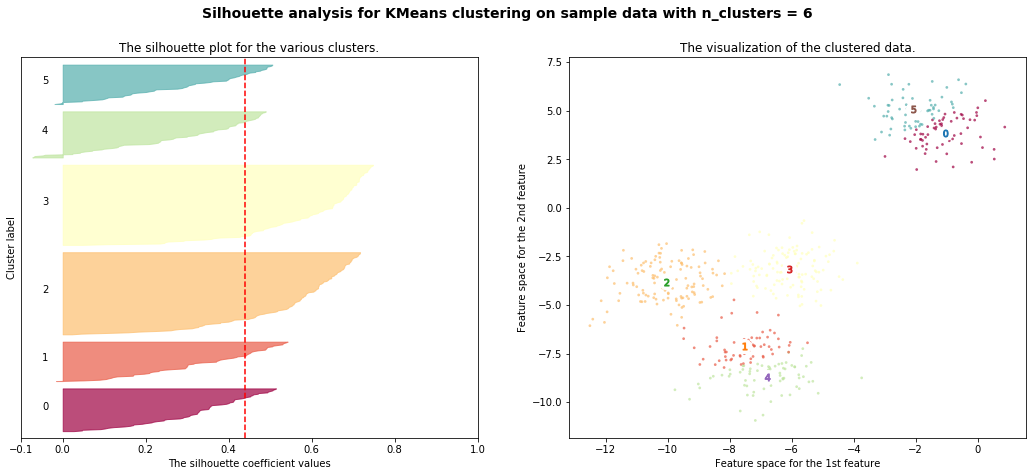

In [161]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

With the analysis, we can see the highest accuracy is for the clusters with  n=4 and the silhouette score is about 0.65.

# Build An Classification model with Hierarchical clustering:

# K-Means: 

In [121]:
df_k.sample(5)

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType,label
152,12.26,13.60,0.8333,5.408,2.833,4.756,5.360,3,0
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1,1
43,15.50,14.86,0.8820,5.877,3.396,4.711,5.528,1,1
56,14.46,14.35,0.8818,5.388,3.377,2.802,5.044,1,1
64,12.78,13.57,0.8716,5.262,3.026,1.176,4.782,1,1


In [122]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [123]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=test_size, random_state=seed)

In [124]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
x_train = independent_scalar.fit_transform (x_train) #fit and transform
x_validate = independent_scalar.transform (x_validate) # only transform

# Decision Tree Classifier

In [125]:
from sklearn.tree import DecisionTreeClassifier 
#DecisionTreeClassifier is the corresponding Classifier
Dtree = DecisionTreeClassifier(max_depth=3)
Dtree.fit (x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [126]:
predictValues_train = Dtree.predict(x_train)
accuracy_train=accuracy_score(y_train, predictValues_train)

predictValues_validate = Dtree.predict(x_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)

print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.9863945578231292
Validation Accuracy  ::  0.9841269841269841


In [127]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.95      1.00      0.98        21
           2       1.00      0.95      0.98        21

    accuracy                           0.98        63
   macro avg       0.98      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



# RANDOM FOREST:

In [128]:
RFclassifier = RandomForestClassifier(n_estimators = 100, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [129]:
predictValues_validate = RFclassifier.predict(x_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)

predictValues_train = RFclassifier.predict(x_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  1.0
Validation Accuracy  ::  0.9841269841269841


In [130]:
RFclassifier = RandomForestClassifier(n_estimators = 11, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [131]:
predictValues_validate = RFclassifier.predict(x_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)

predictValues_train = RFclassifier.predict(x_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  1.0
Validation Accuracy  ::  0.9841269841269841


In [132]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.95      1.00      0.98        21
           2       1.00      0.95      0.98        21

    accuracy                           0.98        63
   macro avg       0.98      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



# K-NN :

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [134]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [135]:
x_standardize = x.apply(zscore)

In [136]:
#KNN only takes array as input hence it is importanct to convert dataframe to array
x1 = np.array(x_standardize)
y1 = np.array(y)

In [137]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x1, y1, test_size=test_size, random_state=seed)

In [138]:
KNN = KNeighborsClassifier(n_neighbors= 8 , weights = 'uniform', metric='euclidean')
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [139]:
predictValues_train = KNN.predict(x_train)
print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)
print("Train Accuracy  :: ",accuracy_train)

[2 2 1 2 1 1 2 0 1 0 0 1 0 2 2 0 1 1 0 0 0 1 1 1 1 2 0 0 0 2 1 1 1 2 1 1 0
 2 1 2 0 0 2 0 2 1 2 2 1 0 1 1 1 1 2 0 2 2 1 2 0 1 0 1 0 1 1 1 1 0 0 2 2 0
 1 1 1 0 2 1 0 2 0 2 1 0 1 0 0 0 2 0 1 0 0 0 0 1 1 1 0 2 0 2 0 2 0 1 2 0 2
 1 1 1 0 1 2 0 1 1 1 1 1 1 2 1 0 1 2 0 1 0 2 1 2 2 2 1 0 0 2 2 0 1 1 0 0]
Train Accuracy  ::  0.9659863945578231


In [140]:
predictValues_validate = KNN.predict(x_validate)
print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)
print("Validation Accuracy  :: ",accuracy_validate)

[2 1 2 1 1 1 2 1 1 0 1 2 2 2 2 0 2 2 2 2 0 0 2 0 2 0 0 1 2 0 0 0 1 2 1 0 2
 1 2 1 0 2 2 0 0 0 1 0 1 1 1 1 0 1 0 2 1 1 0 0 1 1 1]
Validation Accuracy  ::  0.9682539682539683


Building a model using K-means algorithms of clustering, Random forest classifier has the highest accuracy in f1 score without underfitting or overfitting values.

# Build An Classification model with Non - Hierarchical clustering:

# Agglomerative Clustering:

In [141]:
df_h.sample(5)

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType,label
172,11.27,12.97,0.8419,5.088,2.763,4.309,5.000,3,2
28,14.11,14.18,0.8820,5.541,3.221,2.754,5.038,1,0
69,12.73,13.75,0.8458,5.412,2.882,3.533,5.067,1,0
95,16.87,15.65,0.8648,6.139,3.463,3.696,5.967,2,0
14,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,1,0


In [142]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [143]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=test_size, random_state=seed)

In [144]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
x_train = independent_scalar.fit_transform (x_train) #fit and transform
x_validate = independent_scalar.transform (x_validate) # only transform

# DECISION TREE CLASSIFIER:

In [145]:
from sklearn.tree import DecisionTreeClassifier 
#DecisionTreeClassifier is the corresponding Classifier
Dtree = DecisionTreeClassifier(max_depth=3)
Dtree.fit (x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [146]:
predictValues_train = Dtree.predict(x_train)
accuracy_train=accuracy_score(y_train, predictValues_train)

predictValues_validate = Dtree.predict(x_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)

print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.9863945578231292
Validation Accuracy  ::  0.9841269841269841


In [147]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.95      1.00      0.98        21
           2       1.00      0.95      0.98        21

    accuracy                           0.98        63
   macro avg       0.98      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



# RANDOM FOREST:

In [148]:
RFclassifier = RandomForestClassifier(n_estimators = 100, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [149]:
predictValues_validate = RFclassifier.predict(x_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)

predictValues_train = RFclassifier.predict(x_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  1.0
Validation Accuracy  ::  0.9841269841269841


In [150]:
RFclassifier = RandomForestClassifier(n_estimators = 11, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [151]:
predictValues_validate = RFclassifier.predict(x_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)

predictValues_train = RFclassifier.predict(x_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  1.0
Validation Accuracy  ::  0.9841269841269841


In [152]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.95      1.00      0.98        21
           2       1.00      0.95      0.98        21

    accuracy                           0.98        63
   macro avg       0.98      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



# K-NN

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [154]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [155]:
x_standardize = x.apply(zscore)

In [156]:
#KNN only takes array as input hence it is importanct to convert dataframe to array
x1 = np.array(x_standardize)
y1 = np.array(y)

In [157]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x1, y1, test_size=test_size, random_state=seed)

In [158]:
KNN = KNeighborsClassifier(n_neighbors= 8 , weights = 'uniform', metric='euclidean')
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [159]:
predictValues_train = KNN.predict(x_train)
print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)
print("Train Accuracy  :: ",accuracy_train)

[2 2 1 2 1 1 2 0 1 0 0 1 0 2 2 0 1 1 0 0 0 1 1 1 1 2 0 0 0 2 1 1 1 2 1 1 0
 2 1 2 0 0 2 0 2 1 2 2 1 0 1 1 1 1 2 0 2 2 1 2 0 1 0 1 0 1 1 1 1 0 0 2 2 0
 1 1 1 0 2 1 0 2 0 2 1 0 1 0 0 0 2 0 1 0 0 0 0 1 1 1 0 2 0 2 0 2 0 1 2 0 2
 1 1 1 0 1 2 0 1 1 1 1 1 1 2 1 0 1 2 0 1 0 2 1 2 2 2 1 0 0 2 2 0 1 1 0 0]
Train Accuracy  ::  0.9659863945578231


In [160]:
predictValues_validate = KNN.predict(x_validate)
print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)
print("Validation Accuracy  :: ",accuracy_validate)

[2 1 2 1 1 1 2 1 1 0 1 2 2 2 2 0 2 2 2 2 0 0 2 0 2 0 0 1 2 0 0 0 1 2 1 0 2
 1 2 1 0 2 2 0 0 0 1 0 1 1 1 1 0 1 0 2 1 1 0 0 1 1 1]
Validation Accuracy  ::  0.9682539682539683


In agglomerative clustering, Random forest is the best generalized model with accuracy of 0.98%.

___________________________________________________________________________________________________________________________

**NOTE:**

The analysis for the given dataset is done in both the perspectives of classification and clustering algorithms.

The maximum accuracy and the best models are evaluated using different techniques and test scores. 

As per the necessity and requirement the obtained results can be modified further to proceed.

# END